## Project 1 - Recognizing Handwritten Digits

In [1]:
lst = [[1,2,3], [4,5,6], [7,8,9]]
lst

lst[0]

# [1,2,3]
# [4,5,6]
# [7,8,9]

[1, 2, 3]

In [2]:
# Import necessary libraries
from sklearn.datasets import load_digits
import pandas as pd

# Load the digits dataset
digits = load_digits()

# Display basic information about the dataset
print("Digits dataset information:")
print("Number of samples:", len(digits.data))
print("Number of features:", len(digits.data[0]))
print("Number of classes:", len(set(digits.target)))

# Convert the dataset to a Pandas DataFrame for better visualization
digits_df = pd.DataFrame(data=digits.data, columns=[f"pixel_{i}" for i in range(len(digits.data[0]))])
digits_df["target"] = digits.target

# Display the first few rows of the DataFrame
print("\nFirst few rows of the dataset:")
digits_df.head()

Digits dataset information:
Number of samples: 1797
Number of features: 64
Number of classes: 10

First few rows of the dataset:


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
digits.data.shape[1]

64

In [4]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [5]:
len(set(digits.target))

10

In [6]:
mySet = set()
mySet.add(1)
mySet.add(1)
mySet.add(2)
mySet.add(3)
mySet

{1, 2, 3}

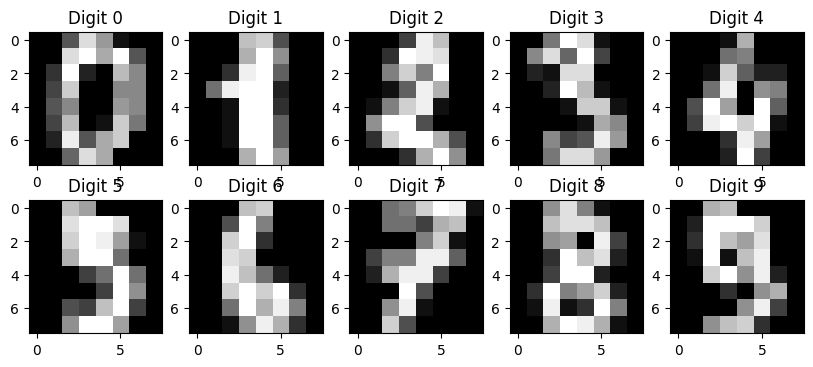

Number of samples: 1797
Number of features: 64
Number of classes: 10


In [7]:
import matplotlib.pyplot as plt

# Display the first few images in the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit {digits.target[i]}")

plt.show()

# Get basic information about the dataset
print(f"Number of samples: {len(digits.images)}")
print(f"Number of features: {len(digits.images[0].ravel())}")
print(f"Number of classes: {len(set(digits.target))}")


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# Split the data into training and testing sets

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9722222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


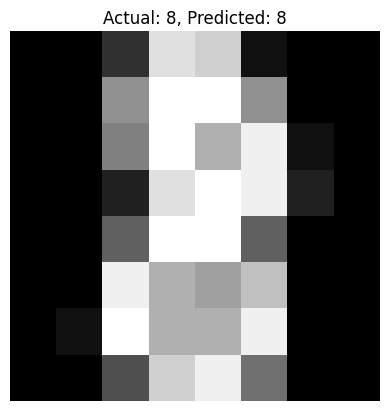

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select a sample
random_index = np.random.randint(0, len(digits.data))
sample_data = digits.data[random_index]
sample_target = digits.target[random_index]

# Reshape the sample data as required by the model for a single prediction
sample_data_reshaped = sample_data.reshape(1, -1)

# Predict the digit using the trained model
predicted_digit = model.predict(sample_data_reshaped)

# Reshape the sample for visualization
sample_image = sample_data.reshape(8, 8)

# Plot the digit
plt.imshow(sample_image, cmap='gray')
plt.title(f'Actual: {sample_target}, Predicted: {predicted_digit[0]}')
plt.axis('off')
plt.show()
